# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

___All the outcomes and understandings are written in <font color= green> GREEN</font>___

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [4]:
# Loading the data using Pandas
df = pd.read_csv("E:\iiit data scince\Lead Scoring Assignment\Leads.csv")
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [5]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [8]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [9]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [11]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [13]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [15]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<font color= green>___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [16]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [17]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [18]:
df2["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [19]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [20]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [21]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [22]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [23]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [24]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [25]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [28]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID', axis=1)
df_final.shape

(9074, 21)

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

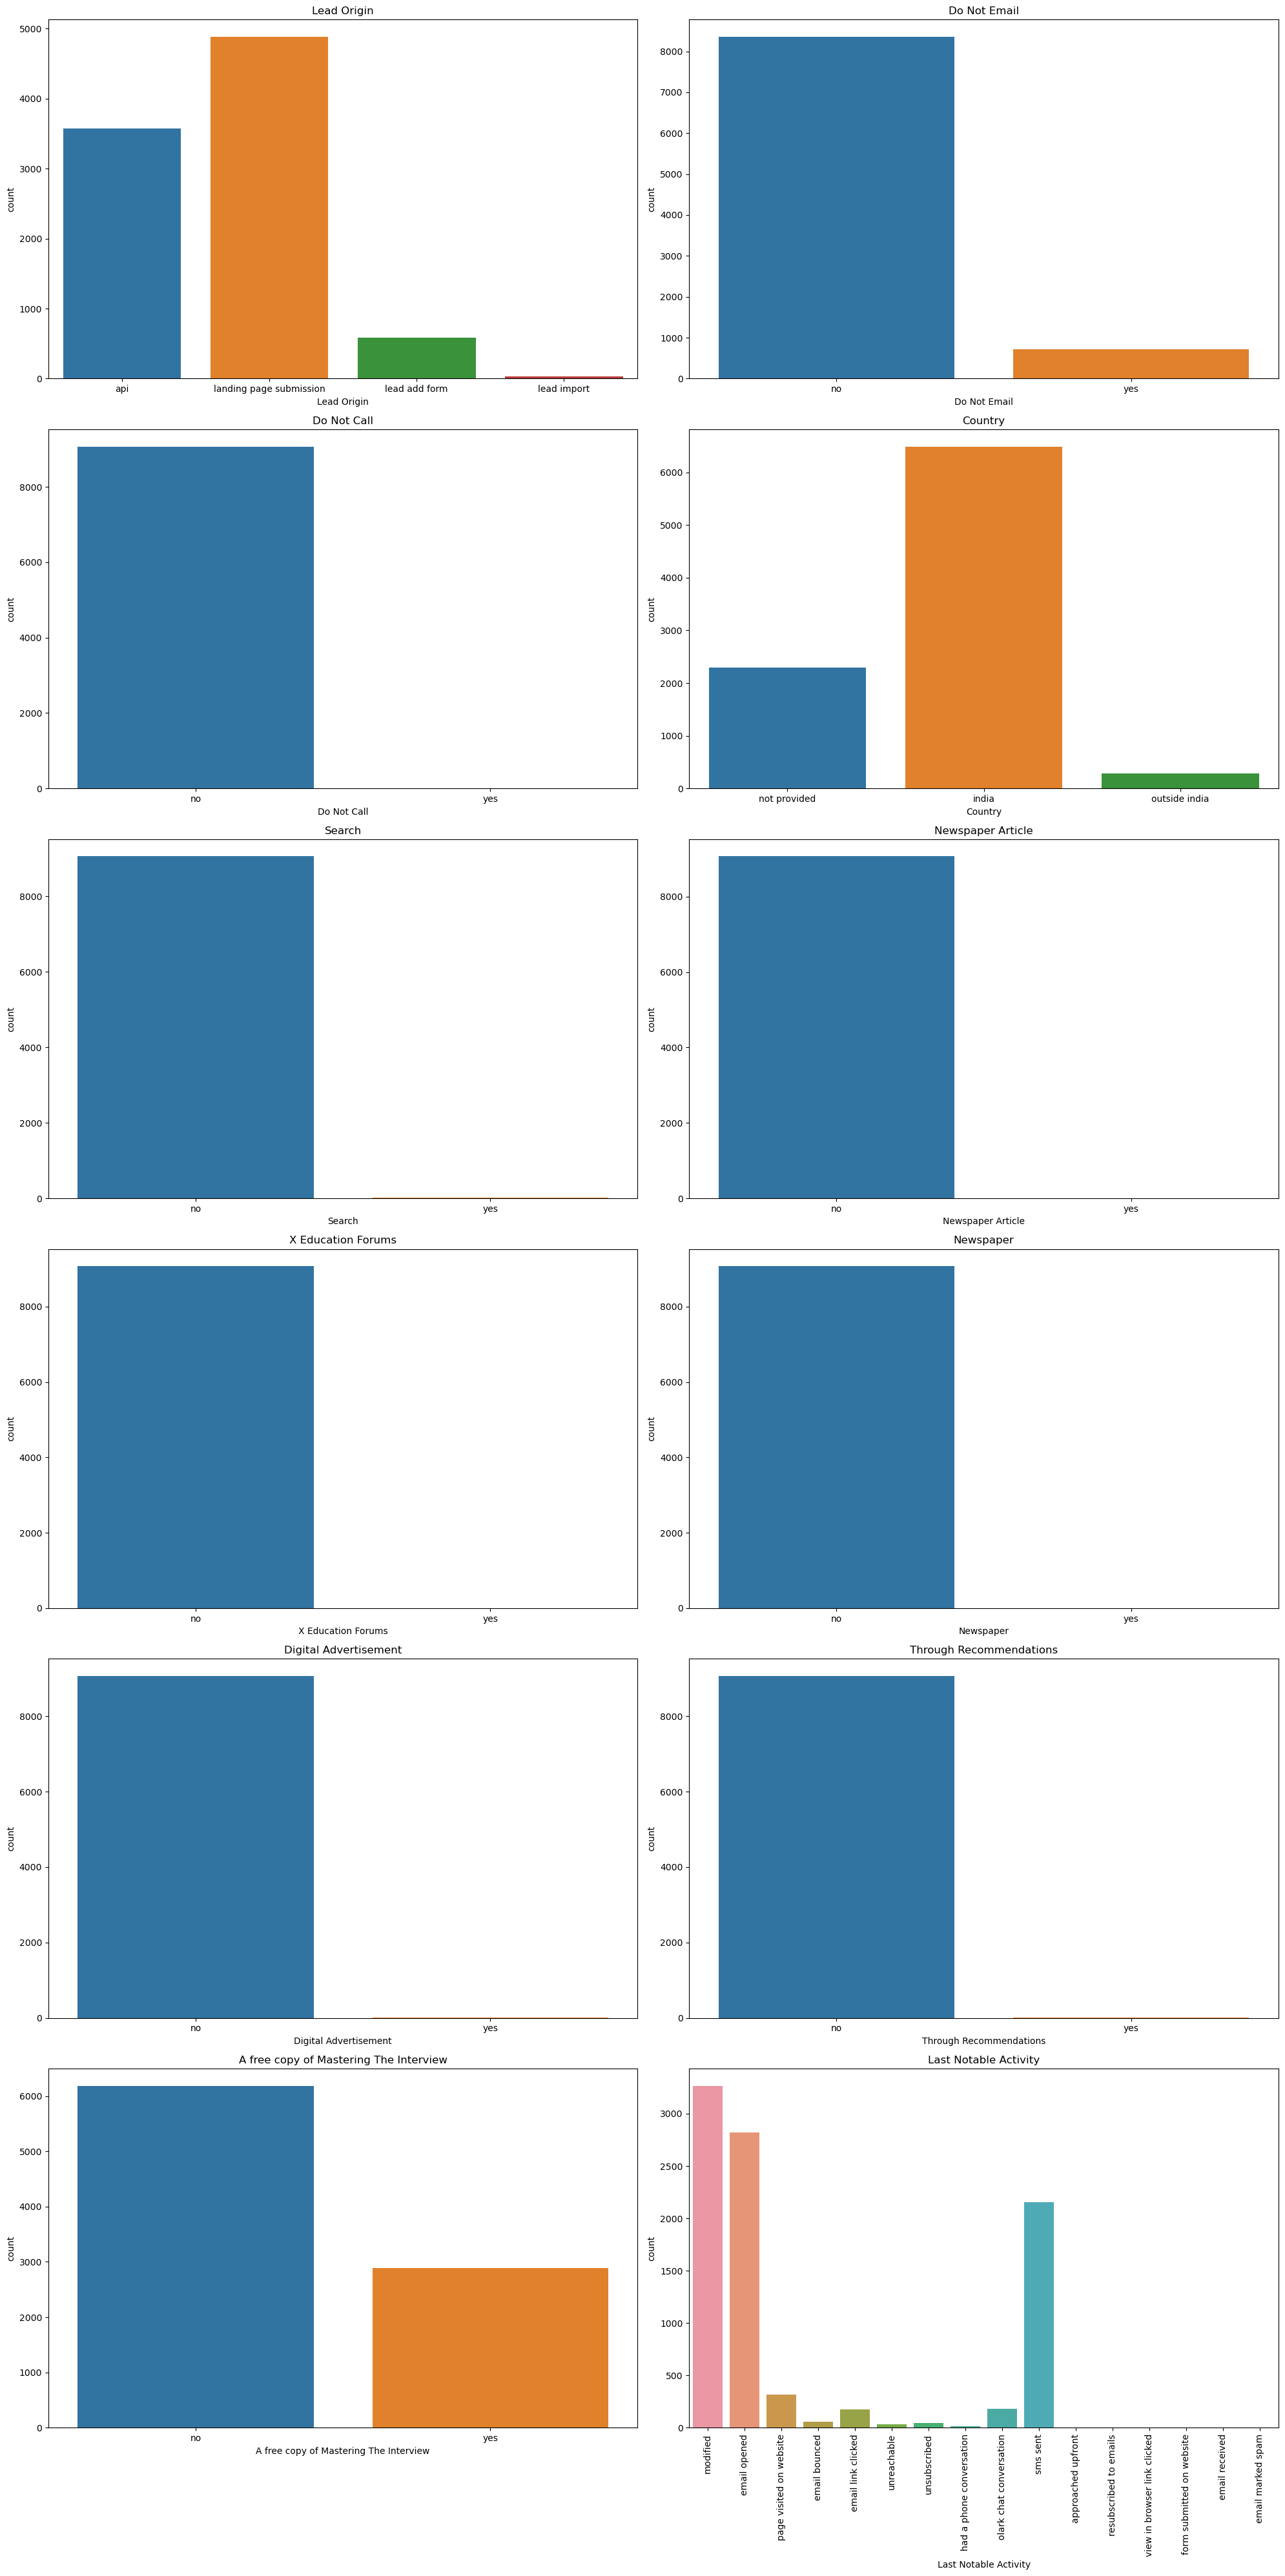

In [31]:
plt.figure(figsize=(20, 40))

# List of columns and titles for convenience
columns = [
    'Lead Origin', 'Do Not Email', 'Do Not Call', 'Country',
    'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations',
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

titles = [
    'Lead Origin', 'Do Not Email', 'Do Not Call', 'Country',
    'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
    'Digital Advertisement', 'Through Recommendations',
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

# Create subplots
for i, (col, title) in enumerate(zip(columns, titles), 1):
    plt.subplot(6, 2, i)
    sns.countplot(data=df_final, x=col)
    plt.title(title)
    if col == 'Last Notable Activity':
        plt.xticks(rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

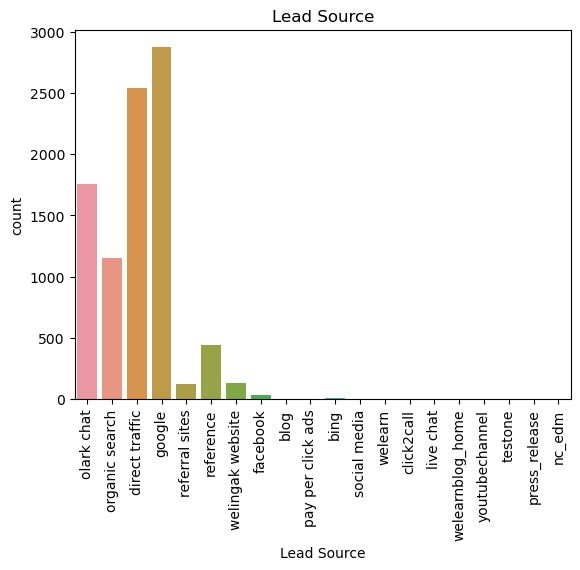

In [35]:
sns.countplot(data = df_final, x='Lead Source')
plt.tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

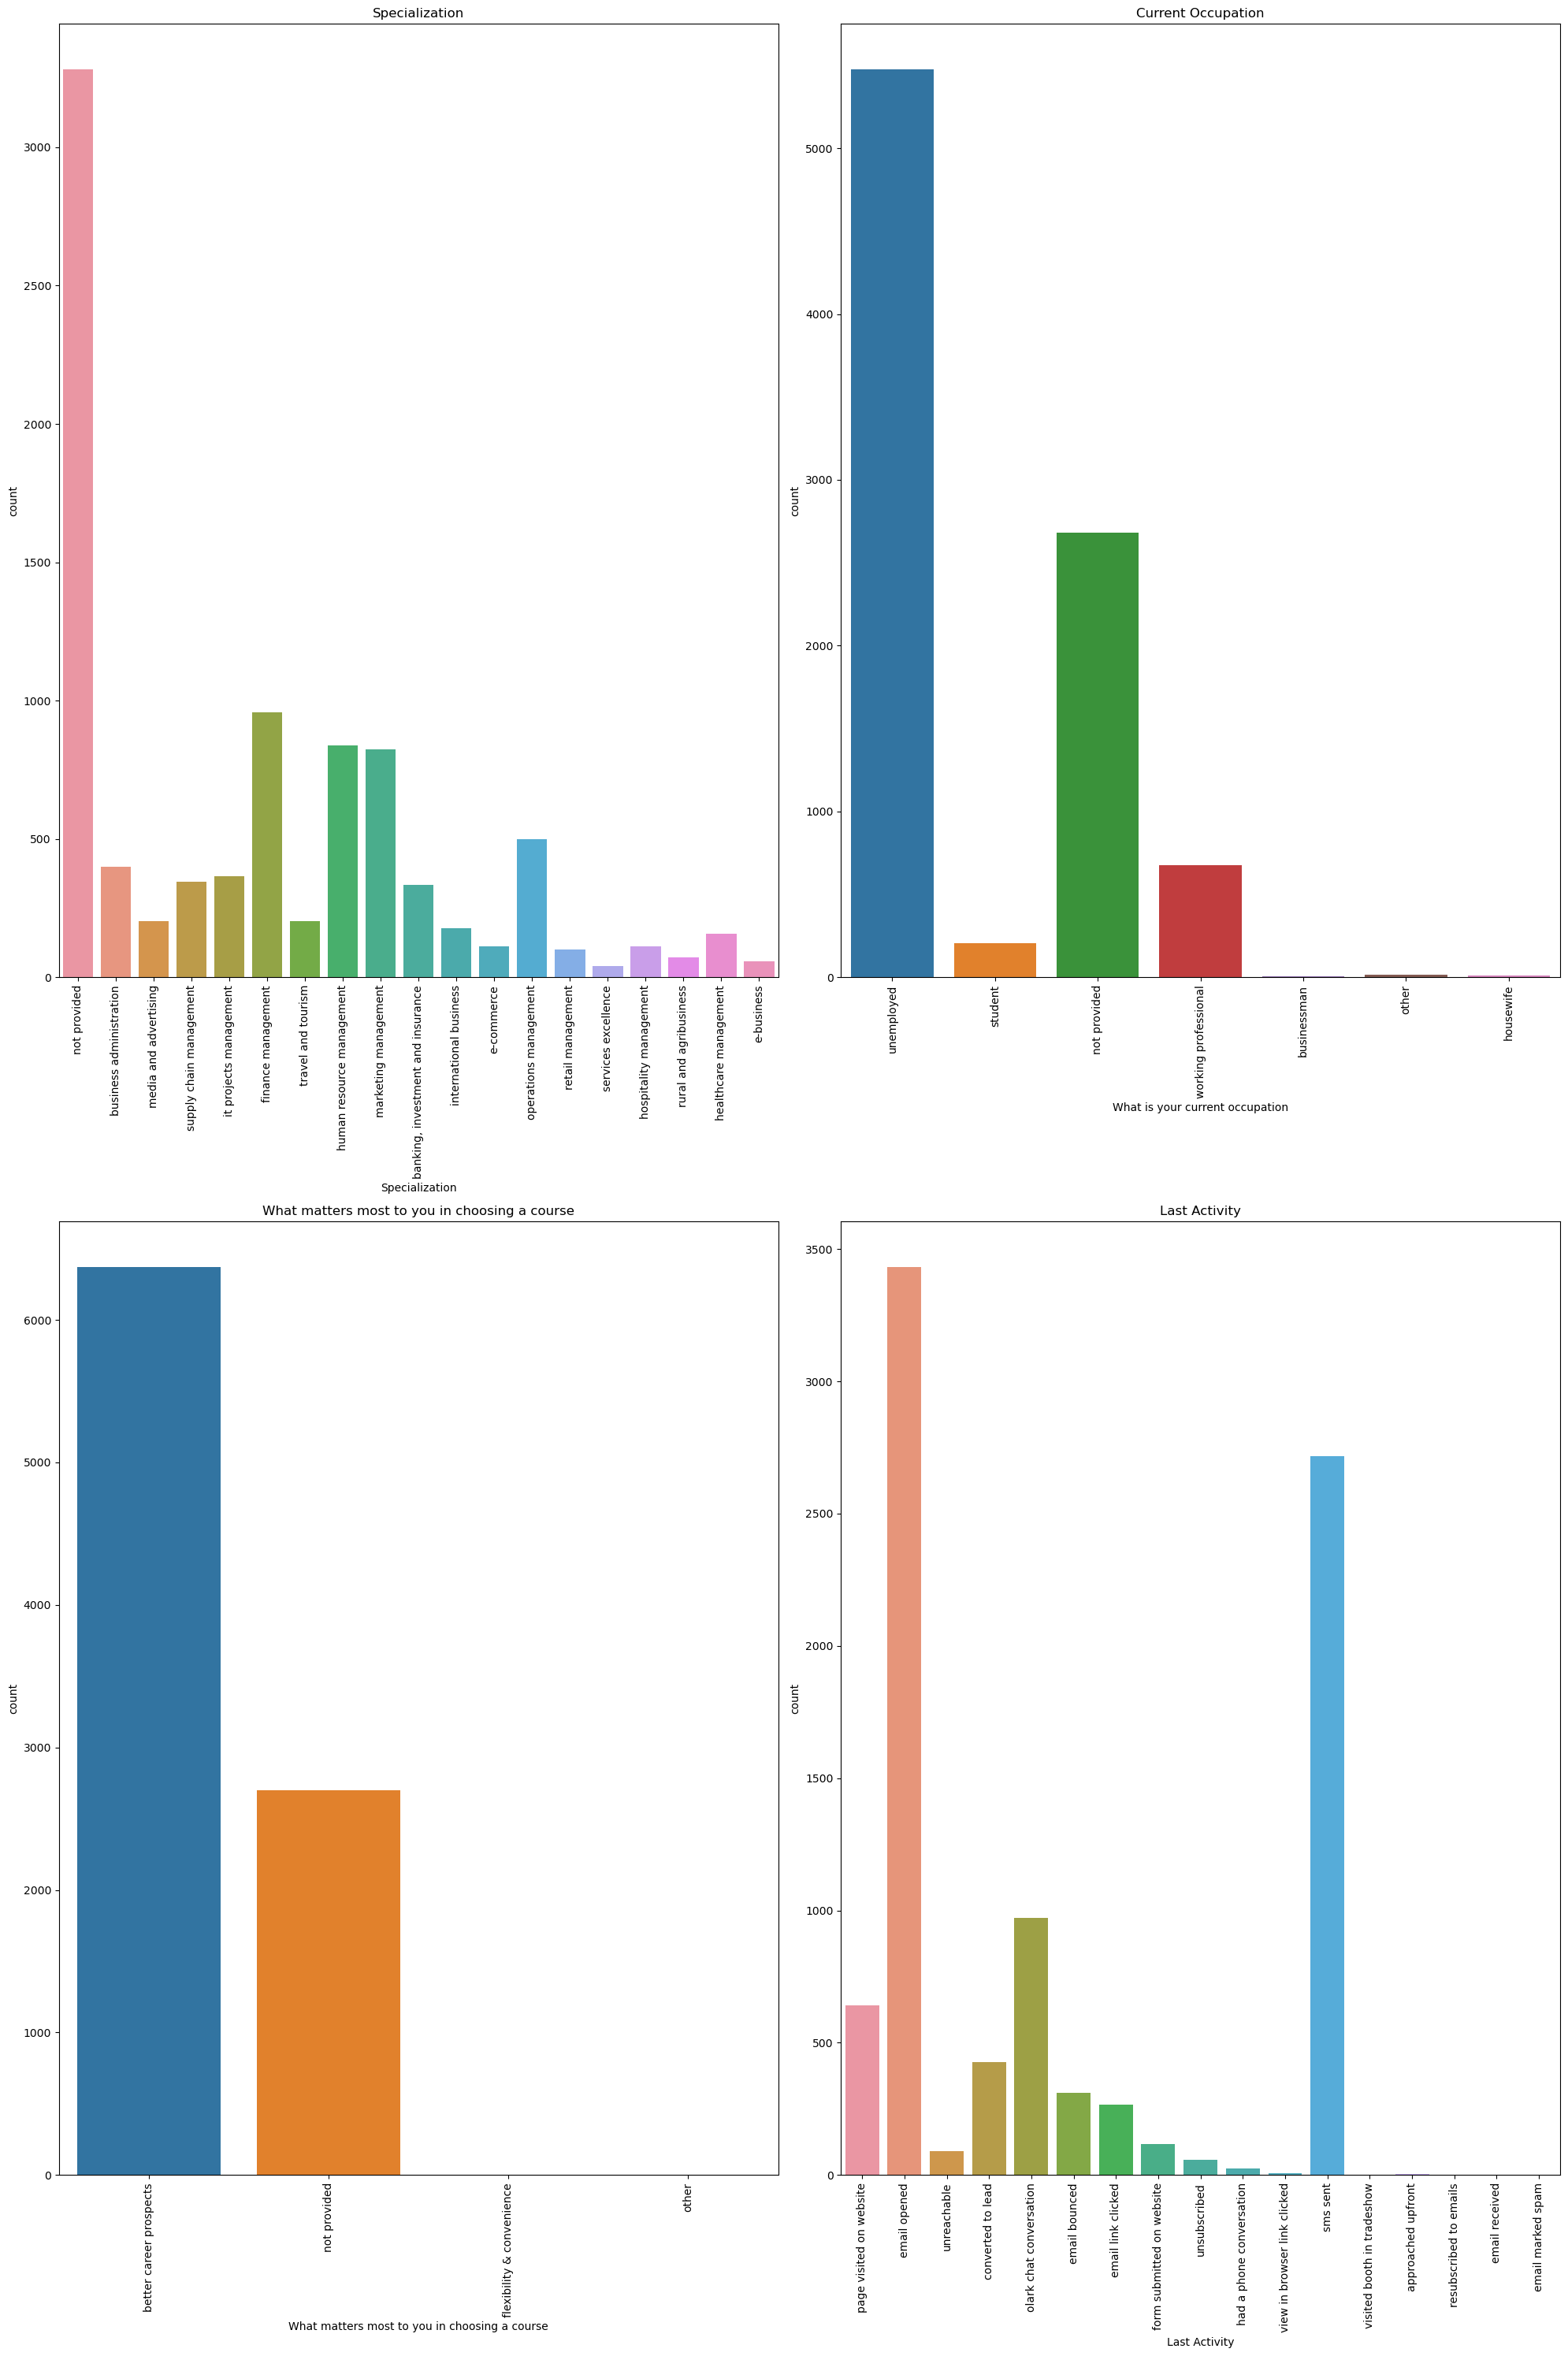

In [37]:
# Create a figure with a specific size
plt.figure(figsize=(20, 30))

# Plot for 'Specialization'
plt.subplot(2, 2, 1)
sns.countplot(data=df_final, x='Specialization')
plt.xticks(rotation=90)
plt.title('Specialization')

# Plot for 'What is your current occupation'
plt.subplot(2, 2, 2)
sns.countplot(data=df_final, x='What is your current occupation')
plt.xticks(rotation=90)
plt.title('Current Occupation')

# Plot for 'What matters most to you in choosing a course'
plt.subplot(2, 2, 3)
sns.countplot(data=df_final, x='What matters most to you in choosing a course')
plt.xticks(rotation=90)
plt.title('What matters most to you in choosing a course')

# Plot for 'Last Activity'
plt.subplot(2, 2, 4)
sns.countplot(data=df_final, x='Last Activity')
plt.xticks(rotation=90)
plt.title('Last Activity')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

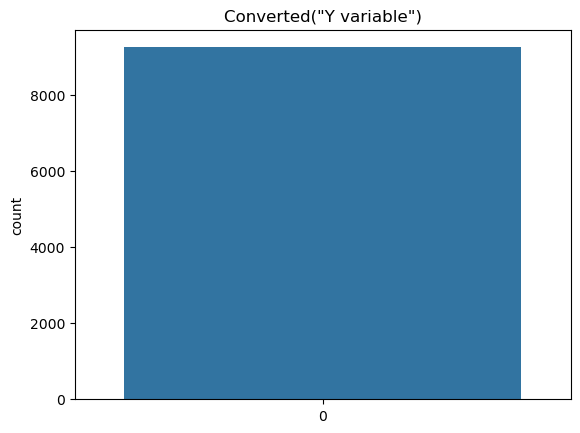

In [38]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### 2.1.1. Numerical Variables

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

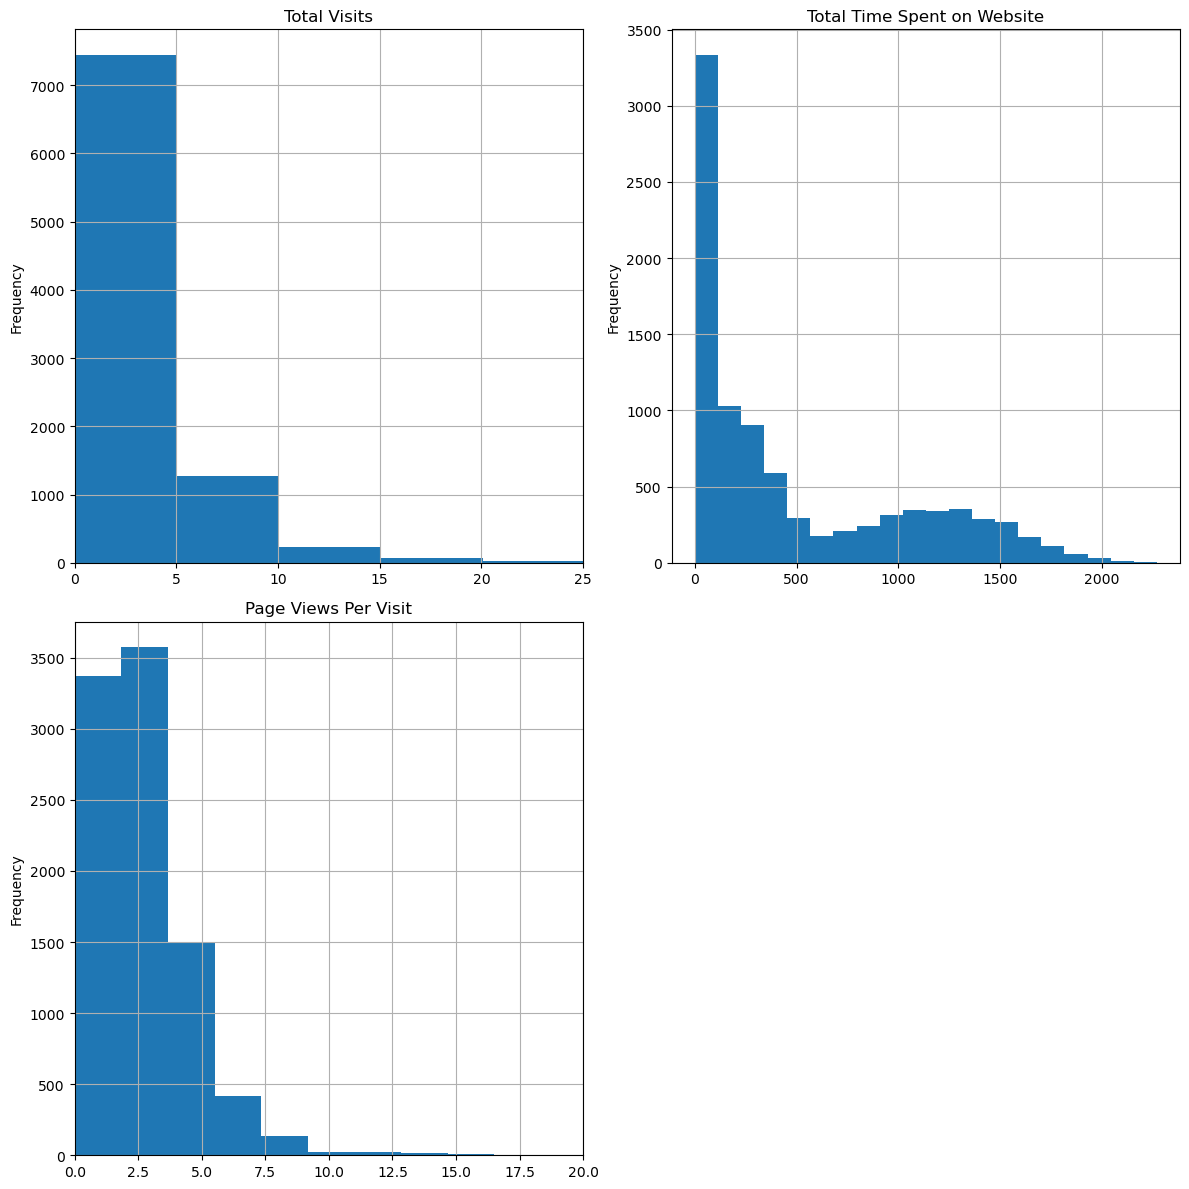

In [40]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins=50)  # Adjusted number of bins
plt.title('Total Visits')
plt.xlim(0, 25)
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins=20)  # Adjusted number of bins
plt.title('Total Time Spent on Website')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins=30)  # Adjusted number of bins
plt.title('Page Views Per Visit')
plt.xlim(0, 20)
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()  # Adjusts subplot parameters to give some padding
plt.show()


### 2.1. Relating all the categorical variables to Converted

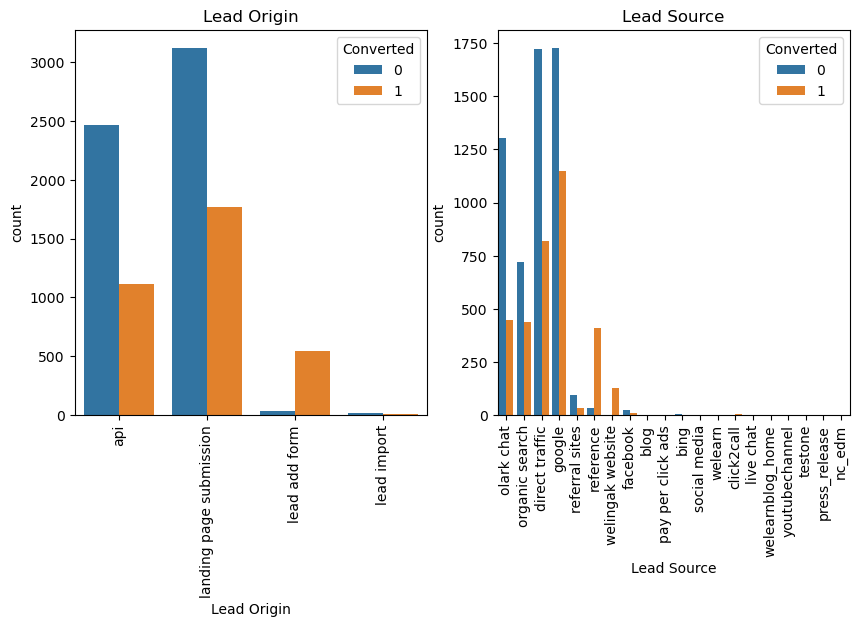

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

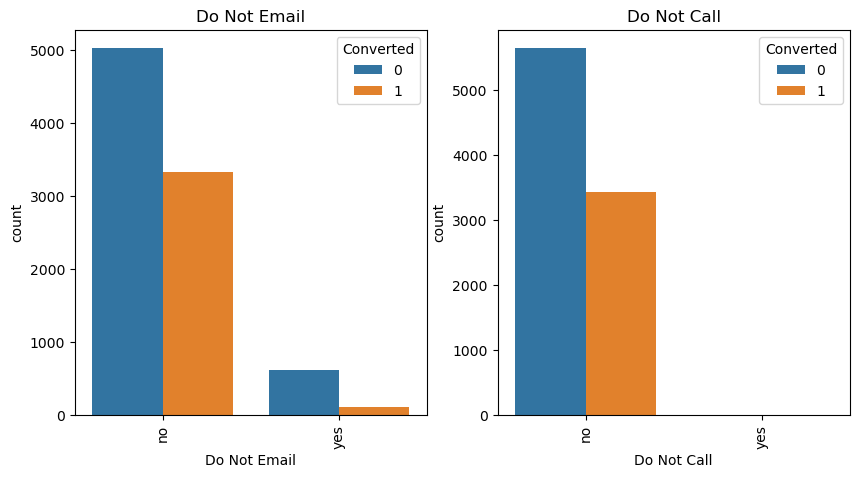

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

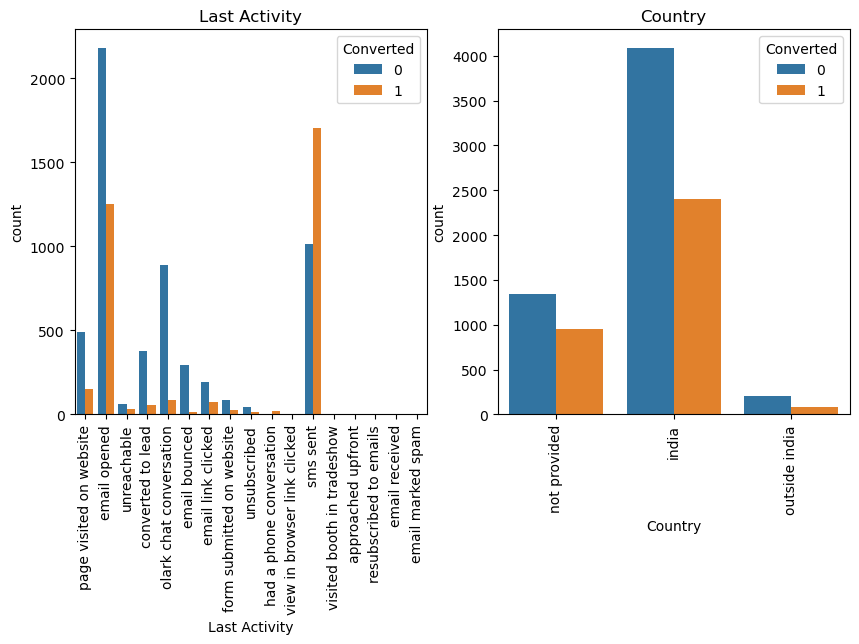

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

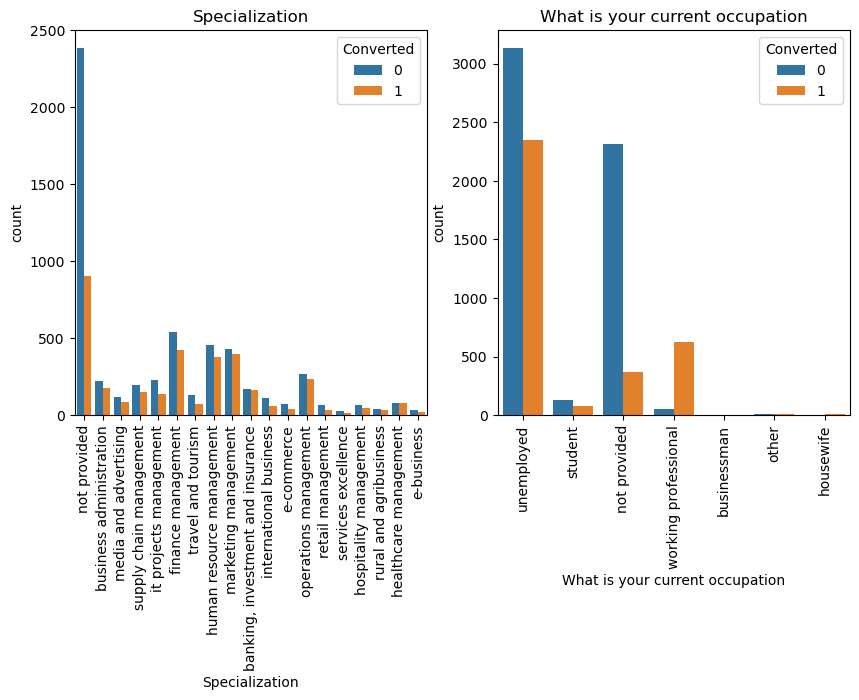

In [44]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

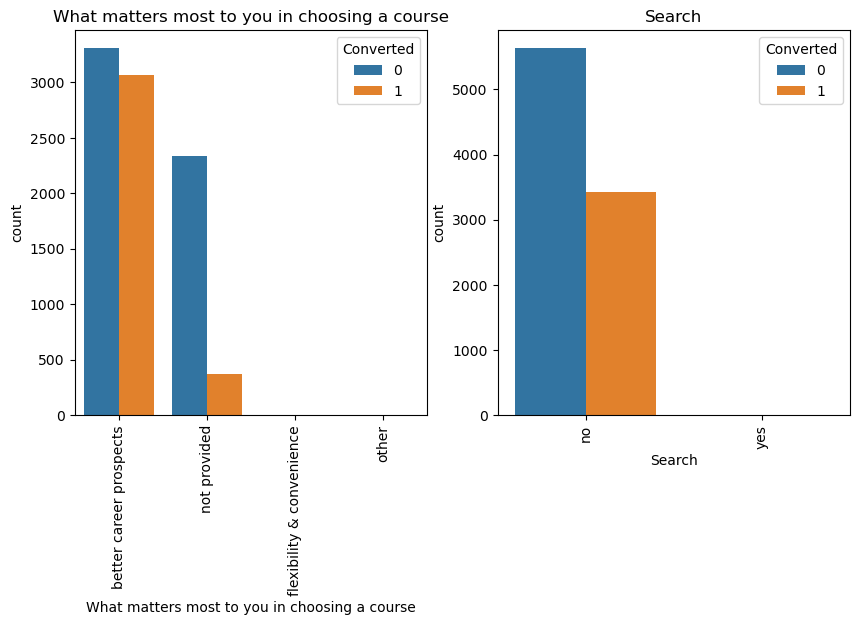

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

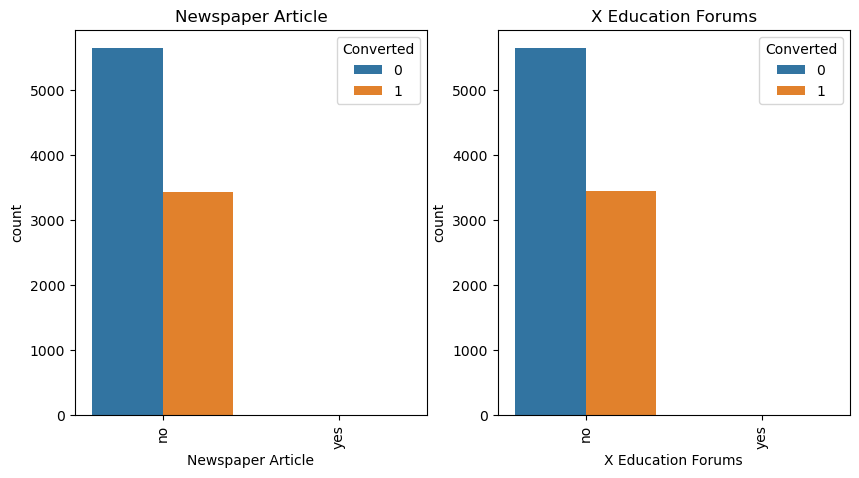

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

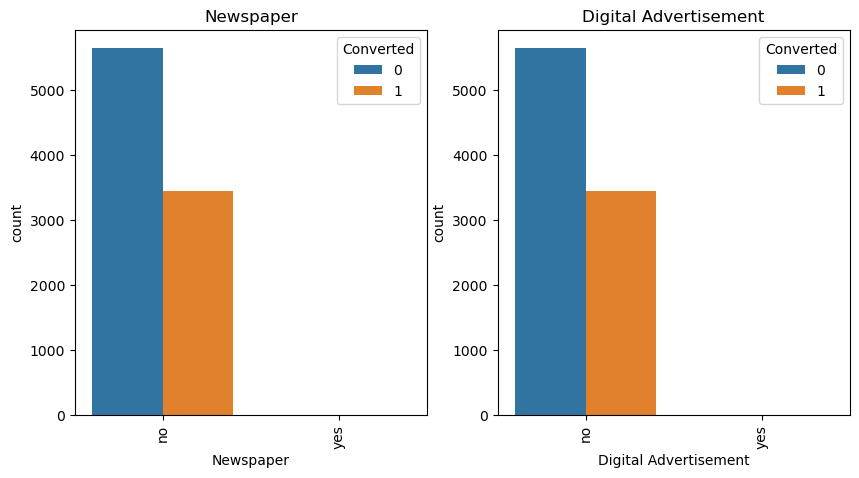

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

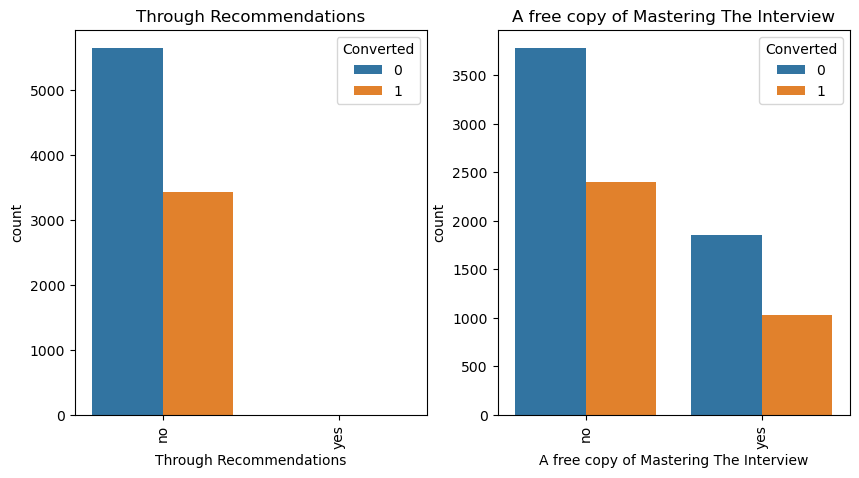

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

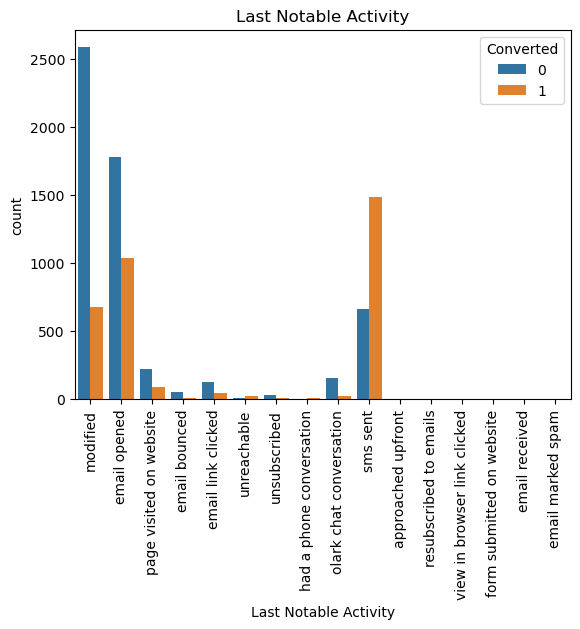

In [49]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

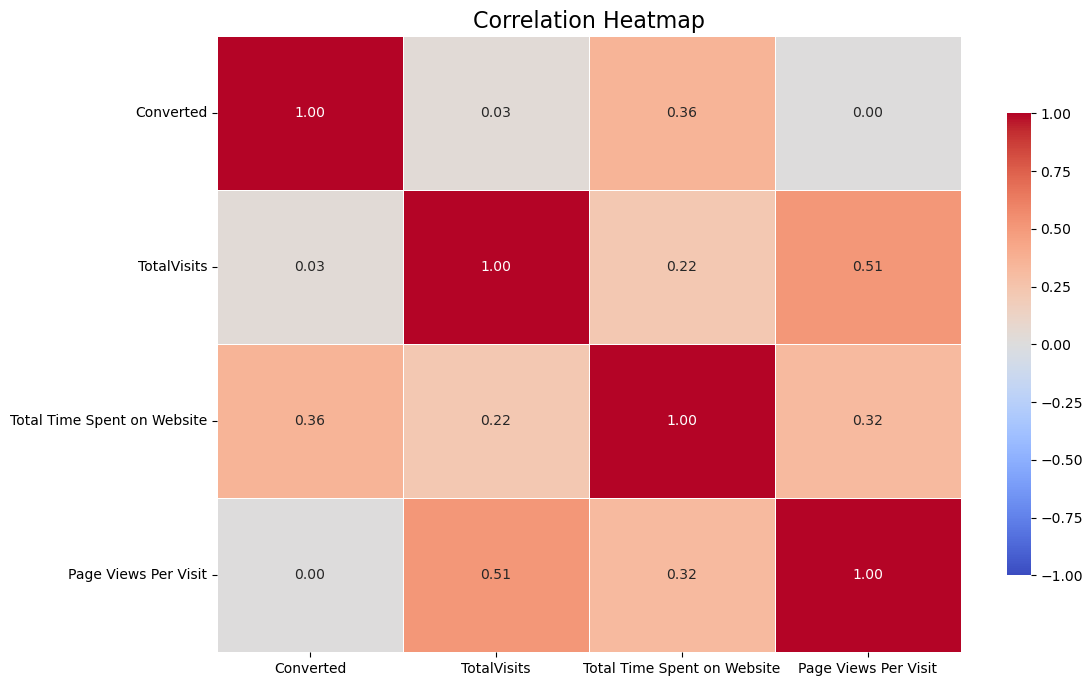

In [52]:
# To check the correlation among varibles
plt.figure(figsize=(12, 8))  # Adjusted size for better readability

# Generate the correlation matrix
numeric_df = df_final.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,  # Add annotations with correlation values
    cmap='coolwarm',  # Choose a color map
    fmt='.2f',  # Format the annotation text to 2 decimal places
    linewidths=0.5,  # Add lines between cells
    vmin=-1, vmax=1,  # Set the range of the color map
    cbar_kws={'shrink': 0.75}  # Adjust the color bar size
)

# Set the title
plt.title('Correlation Heatmap', fontsize=16)

<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [53]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

## 3. Dummy Variables

In [54]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [55]:
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,False,False,False,False,False,False,False,False,False,False
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,False,False,False,False,False,False,True,False,False,False


In [58]:
# Drop specified columns from the DataFrame
df_final_dum = df_final_dum.drop(
    columns=['What is your current occupation_not provided', 'Lead Origin', 'Lead Source', 
             'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 
             'Specialization_not provided', 'What is your current occupation', 
             'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 
             'X Education Forums', 'Newspaper', 'Digital Advertisement', 
             'Through Recommendations', 'A free copy of Mastering The Interview', 
             'Last Notable Activity']
)

# Verify the result
print(df_final_dum.head())
print(df_final_dum.columns)


   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_lead import  Specialization_business administration  \
0                    False        

## 4. Test-Train Split

In [59]:
# Import the required library
from sklearn.model_selection import train_test_split

In [61]:
# Drop the 'Converted' column from df_final_dum
X = df_final_dum.drop(columns=['Converted'])

# Display the first few rows of X
print(X.head())


   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_landing page submission  Lead Origin_lead add form  \
0                                False                      False   
1                                False                      False   
2                                 True                      False   
3                                 True                      False   
4                                 True                      False   

   Lead Origin_lead import  Specialization_business administration  \
0                    False                                   False   
1                    False    

In [62]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [63]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [64]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


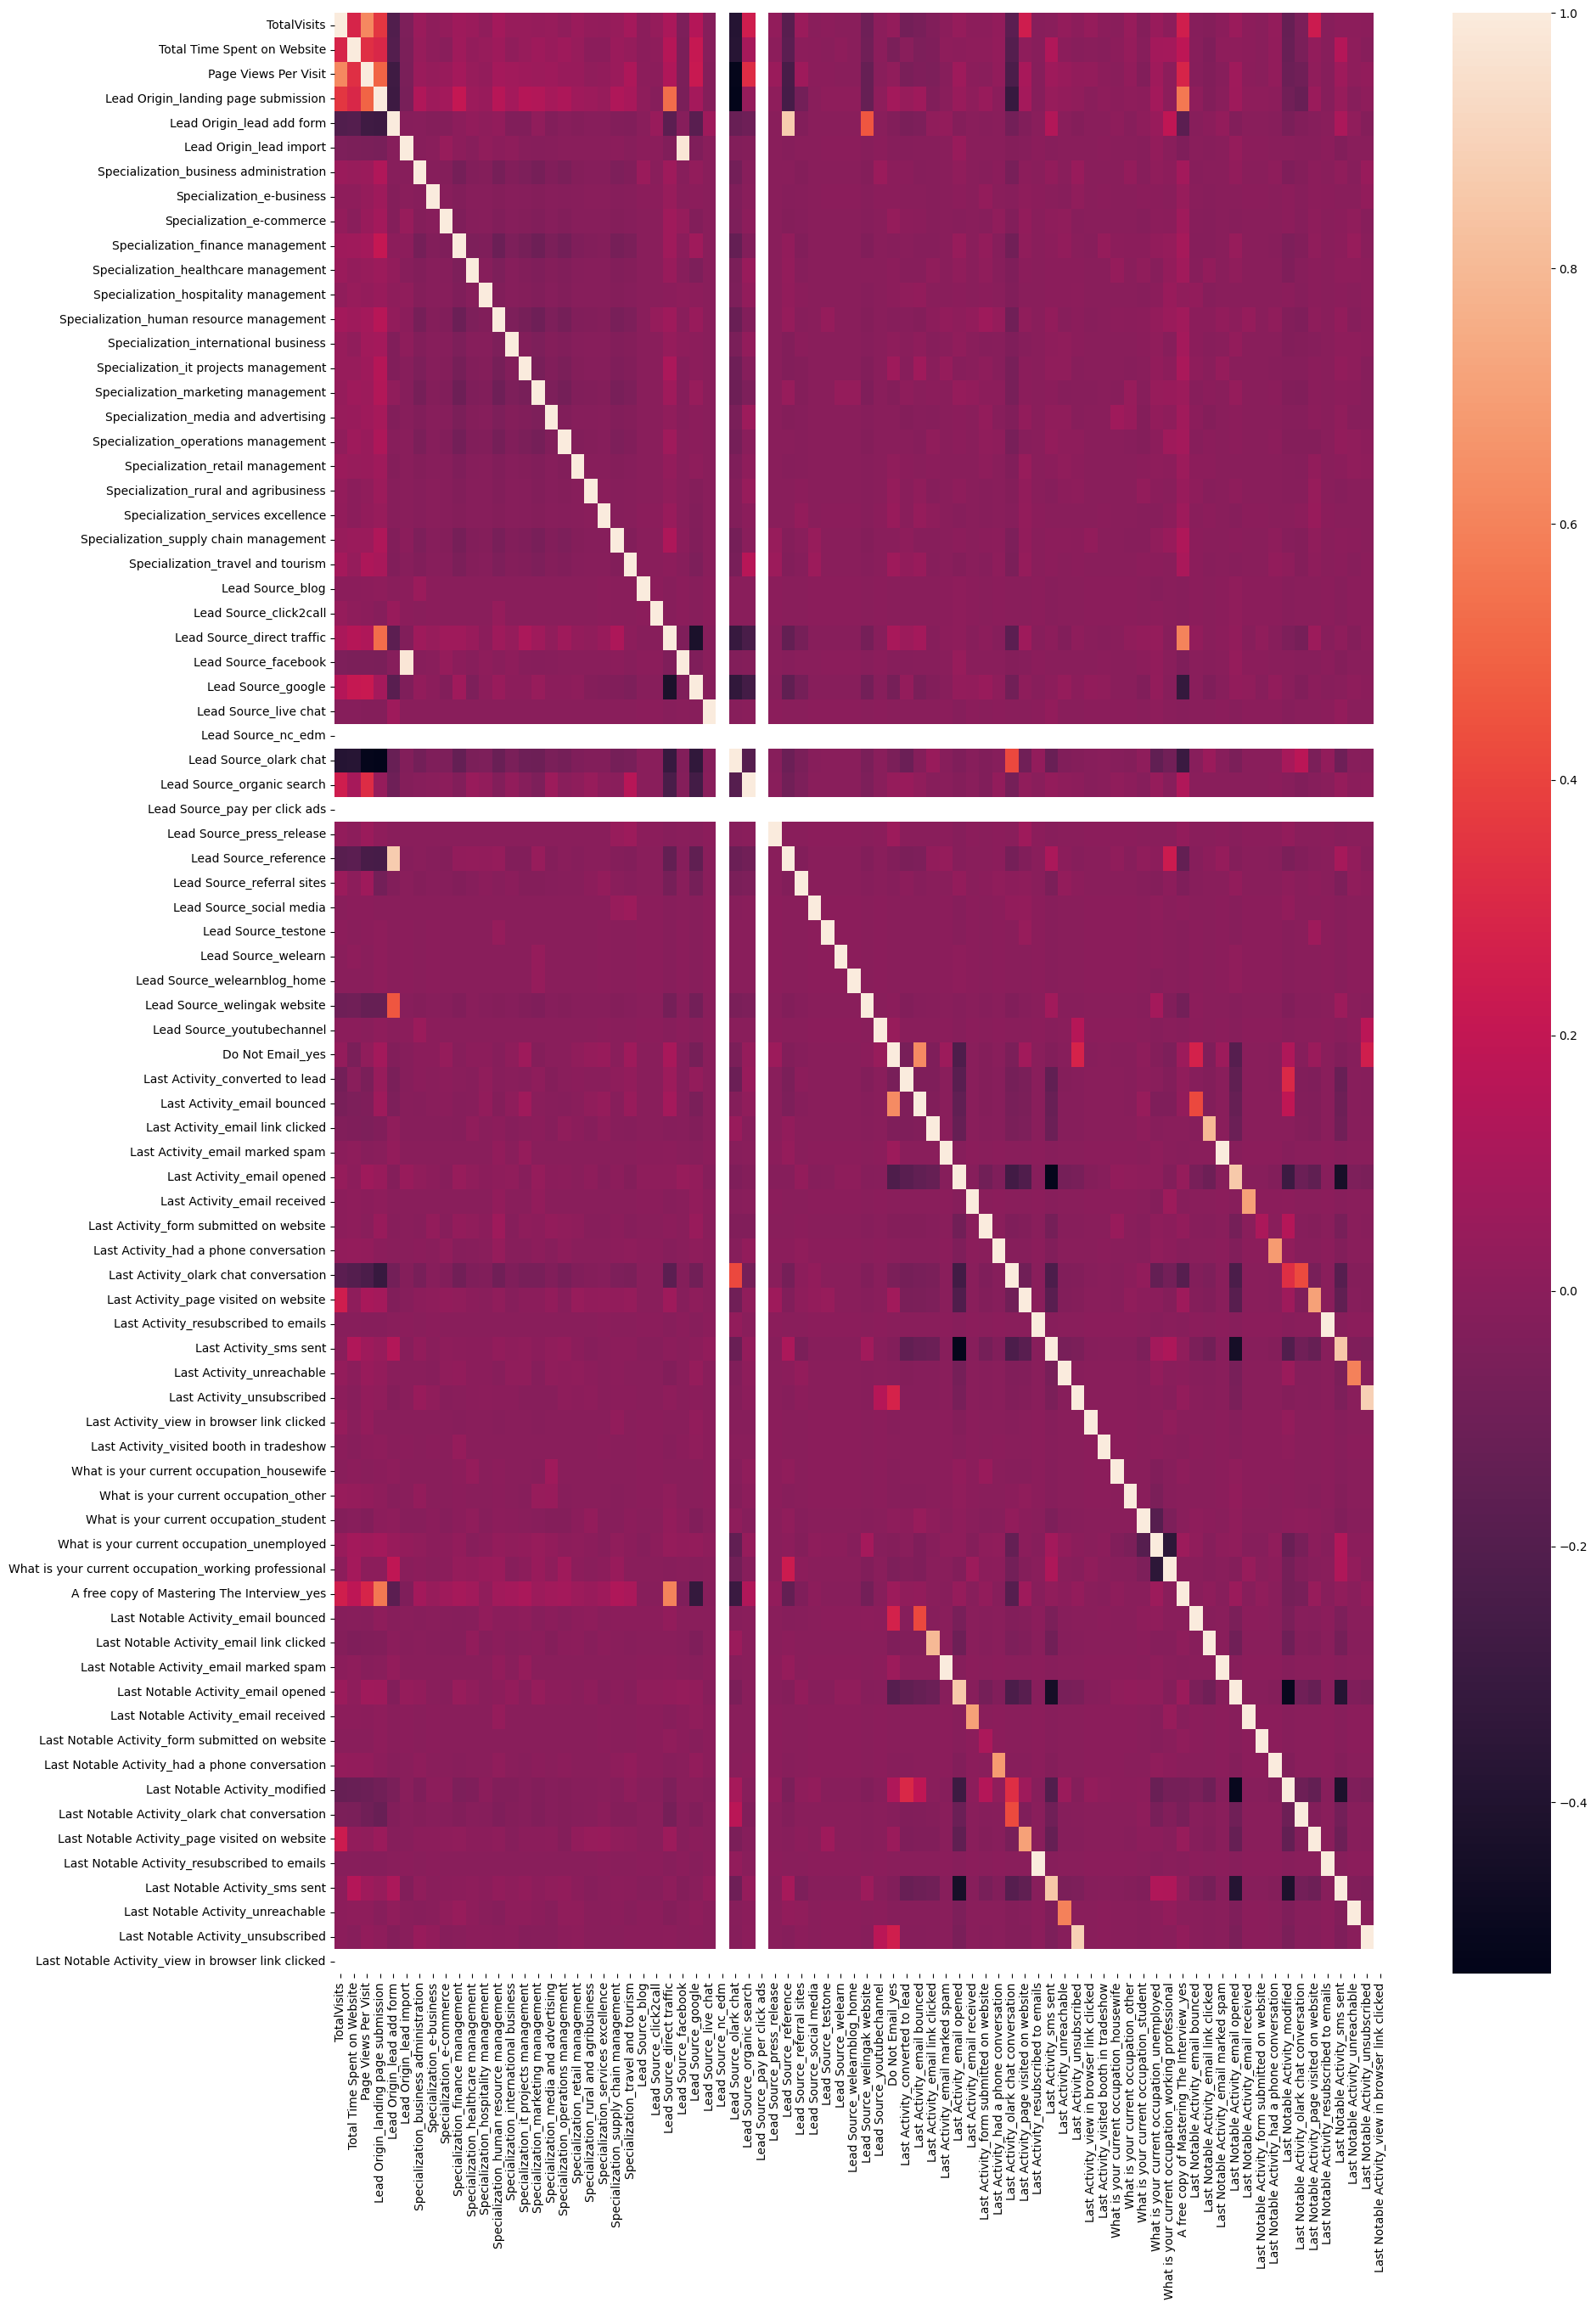

In [75]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## 5. Model Building 

In [76]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [81]:
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [82]:
# Running RFE with 15 variables as output
# Sample data (replace with your actual data)
# X_train = pd.DataFrame(...)  # Your training features
# y_train = pd.Series(...)     # Your training labels

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Initialize and fit RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

# Retrieve selected features
selected_features = rfe.support_
selected_indices = [i for i, x in enumerate(selected_features) if x]
selected_feature_names = X_train.columns[selected_indices]

# Print selected features
print("Selected Features:")
print(selected_feature_names)

# Transform training data
X_train_selected = X_train.iloc[:, selected_indices]

# Fit the model
logreg.fit(X_train_selected, y_train)

# Predict and evaluate
y_train_pred = logreg.predict(X_train_selected)
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy with Selected Features: {accuracy:.2f}")

Selected Features:
Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')
Training Accuracy with Selected Features: 0.81


In [83]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [85]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= green>___All the variables selected by RFE, next statistics part (p-values and the VIFs).___</font>

In [86]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [87]:
# Importing statsmodels
import statsmodels.api as sm

In [93]:
# Add a constant (intercept) to the feature matrix
X_train_sm = sm.add_constant(X_train)

# Initialize and fit the GLM model
# Create example data
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

# Add a constant (intercept) to the feature matrix
X_train_sm = sm.add_constant(X_train)

# Initialize and fit the GLM model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()


# Print the summary of the model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68.118
Date:                Tue, 17 Sep 2024   Deviance:                       136.24
Time:                        00:55:09   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01383
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2021      0.203     -0.994      0.3

In [94]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [95]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,feature1,1.01
1,feature2,1.01


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [97]:
# Sample data preparation
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'Last Notable Activity_had a phone conversation': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

# Drop a column if it exists
if 'Last Notable Activity_had a phone conversation' in X_train.columns:
    X_train.drop('Last Notable Activity_had a phone conversation', axis=1, inplace=True)

# Add a constant (intercept) to the feature matrix
X_train_sm = sm.add_constant(X_train)

# Initialize and fit the GLM model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Print the summary of the model
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.165
Date:                Tue, 17 Sep 2024   Deviance:                       134.33
Time:                        00:56:21   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03592
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1697      0.205     -0.827      0.4

In [98]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.165
Date:                Tue, 17 Sep 2024   Deviance:                       134.33
Time:                        00:56:24   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03592
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1697      0.205     -0.827      0.408      -0.572       0.233
feature1      -0.3124      0.208     -1.500      0.134      -0.721       0.096
feature2       0.2651      0.201      1.318      0.187      -0.129       0.659
==============================================================================
"""

In [99]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,feature1,1.01
1,feature2,1.01


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [102]:
# Example DataFrame creation
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'What is your current occupation_housewife': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

# Check initial columns
print("Initial columns:", X_train.columns)

# Drop the column if it exists
if 'What is your current occupation_housewife' in X_train.columns:
    X_train.drop('What is your current occupation_housewife', axis=1, inplace=True)

# Verify the column has been dropped
print("Columns after dropping:", X_train.columns)
print(X_train.head())

Initial columns: Index(['feature1', 'feature2', 'What is your current occupation_housewife'], dtype='object')
Columns after dropping: Index(['feature1', 'feature2'], dtype='object')
   feature1  feature2
0  1.764052  1.883151
1  0.400157 -1.347759
2  0.978738 -1.270485
3  2.240893  0.969397
4  1.867558 -1.173123


In [103]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.165
Date:                Tue, 17 Sep 2024   Deviance:                       134.33
Time:                        00:57:19   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03592
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1697      0.205     -0.827      0.408      -0.572       0.233
feature1      -0.3124      0.208     -1.500      0.134      -0.721       0.096
feature2       0.2651      0.201      1.318      0.187      -0.129       0.659
==============================================================================
"""

In [104]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,feature1,1.01
1,feature2,1.01


<font color= green>___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___</font>

In [107]:
# Create an example DataFrame
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'What is your current occupation_other': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

# Check initial columns
print("Initial columns:", X_train.columns)

# Drop the column if it exists
if 'What is your current occupation_other' in X_train.columns:
    X_train.drop('What is your current occupation_other', axis=1, inplace=True)

# Verify the column has been dropped
print("Columns after dropping:", X_train.columns)
print(X_train.head())

Initial columns: Index(['feature1', 'feature2', 'What is your current occupation_other'], dtype='object')
Columns after dropping: Index(['feature1', 'feature2'], dtype='object')
   feature1  feature2
0  1.764052  1.883151
1  0.400157 -1.347759
2  0.978738 -1.270485
3  2.240893  0.969397
4  1.867558 -1.173123


In [108]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67.165
Date:                Tue, 17 Sep 2024   Deviance:                       134.33
Time:                        00:58:28   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03592
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1697      0.205     -0.827      0.408      -0.572       0.233
feature1      -0.3124      0.208     -1.500      0.134      -0.721       0.096
feature2       0.2651      0.201      1.318      0.187      -0.129       0.659
==============================================================================
"""

In [109]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,feature1,1.01
1,feature2,1.01


<font color= green>___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## 6. Creating Prediction

In [110]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.444826
1    0.342531
2    0.307401
3    0.351419
4    0.256515
5    0.657201
6    0.359809
7    0.420531
8    0.592014
9    0.523605
dtype: float64

In [111]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.44482614, 0.34253149, 0.30740054, 0.35141947, 0.25651474,
       0.65720051, 0.35980935, 0.42053109, 0.59201446, 0.523605  ])

In [112]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.444826
1,0,0.342531
2,1,0.307401
3,0,0.351419
4,0,0.256515


In [113]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.444826,0
1,0,0.342531,0
2,1,0.307401,0
3,0,0.351419,0
4,0,0.256515,0


## 7. Model Evaluation

In [114]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [115]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[42, 12],
       [27, 19]], dtype=int64)

In [116]:
# Predicted     not_churn    churn
# Actual
# not_churn        3403       492
# churn             729      1727

In [117]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.61

<font color= green>___That's around 81% accuracy with is a very good value___</font>

In [118]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [119]:
# Calculating the sensitivity
TP/(TP+FN)

0.41304347826086957

In [120]:
# Calculating the specificity
TN/(TN+FP)

0.7777777777777778

<font color= green>___With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%.___</font>

## 7. Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [121]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

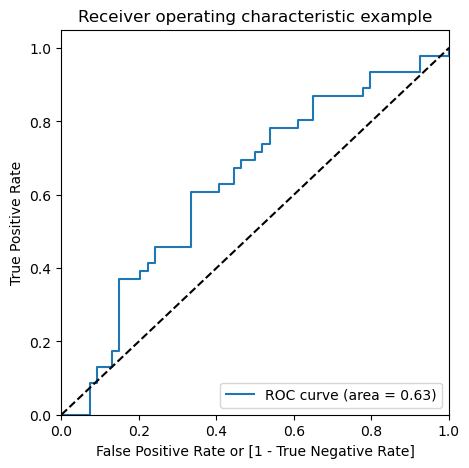

In [123]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= green>___The area under ROC curve is 0.87 which is a very good value.___</font>

In [124]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.444826,0,1,1,1,1,1,0,0,0,0,0
1,0,0.342531,0,1,1,1,1,0,0,0,0,0,0
2,1,0.307401,0,1,1,1,1,0,0,0,0,0,0
3,0,0.351419,0,1,1,1,1,0,0,0,0,0,0
4,0,0.256515,0,1,1,1,0,0,0,0,0,0,0


In [125]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.46,1.000000,0.000000
0.1,0.1,0.46,1.000000,0.000000
0.2,0.2,0.46,1.000000,0.000000
0.3,0.3,0.47,0.978261,0.037037
0.4,0.4,0.57,0.826087,0.351852
0.5,0.5,0.61,0.413043,0.777778
0.6,0.6,0.54,0.086957,0.925926
0.7,0.7,0.54,0.000000,1.000000
0.8,0.8,0.54,0.000000,1.000000
0.9,0.9,0.54,0.000000,1.000000


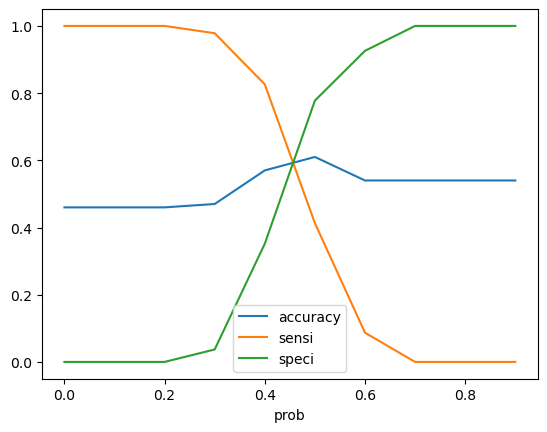

In [126]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<font color= green>___From the graph it is visible that the optimal cut off is at 0.35.___</font>

In [127]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.444826,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.342531,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.307401,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.351419,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.256515,0,1,1,1,0,0,0,0,0,0,0,0


In [128]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.51

In [129]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[ 8, 46],
       [ 3, 43]], dtype=int64)

In [130]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [131]:
# Calculating the sensitivity
TP/(TP+FN)

0.9347826086956522

In [132]:
# Calculating the specificity
TN/(TN+FP)

0.14814814814814814

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 8. Prediction on Test set

In [137]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [138]:
# Substituting all the columns in the final train model
col = X_train.columns

In [140]:
# Sample data creation
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randint(0, 2, size=100)
})
X_test = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'feature3': np.random.randint(0, 2, size=50)
})

# Align columns between X_train and X_test
col = X_train.columns.tolist()  # Get the columns from X_train
X_test = X_test[col]  # Ensure X_test has the same columns

# Add a constant (intercept) to X_test
X_test_sm = sm.add_constant(X_test)

# Verify the result
print(X_test_sm.head())


   const  feature1  feature2  feature3
0    1.0 -0.542861 -0.692050         1
1    1.0  0.416050  1.536377         1
2    1.0 -1.156182  0.286344         1
3    1.0  0.781198  0.608844         1
4    1.0  1.494485 -1.045253         0


In [142]:
# Sample Data
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

X_test = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'feature3': np.random.randint(0, 2, size=50)
})
y_test = pd.Series(np.random.binomial(1, 0.5, size=50))

# Add constant and fit the model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Prepare X_test for prediction
X_test = X_test[X_train.columns]  # Ensure columns match
X_test_sm = sm.add_constant(X_test)

# Generate predictions
y_test_pred = res.predict(X_test_sm)

# Convert to DataFrame
y_pred_df = pd.DataFrame(y_test_pred, columns=['Conversion_Prob'])
y_test_df = pd.DataFrame(y_test, columns=['True_Label'])

# Reset index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Display the final DataFrame
print(y_pred_final.head())

   True_Label  Conversion_Prob
0           0         0.443243
1           1         0.507523
2           1         0.493340
3           1         0.407466
4           1         0.397693


In [143]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,True_Label,Conversion_Prob,final_predicted
0,0,0.443243,1
1,1,0.507523,1
2,1,0.493340,1
3,1,0.407466,1
4,1,0.397693,1
5,1,0.430012,1
6,1,0.586249,1
7,1,0.500875,1
8,1,0.449383,1
9,1,0.469693,1


In [145]:
# Check the overall accuracy
# Sample Data
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

X_test = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'feature3': np.random.randint(0, 2, size=50)
})
y_test = pd.Series(np.random.binomial(1, 0.5, size=50))

# Add constant and fit the model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Prepare X_test for prediction
X_test = X_test[X_train.columns]  # Ensure columns match
X_test_sm = sm.add_constant(X_test)

# Generate predictions
y_test_pred = res.predict(X_test_sm)

# Convert to DataFrame
y_pred_df = pd.DataFrame(y_test_pred, columns=['Conversion_Prob'])
y_test_df = pd.DataFrame(y_test, columns=['True_Label'])

# Reset index
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Concatenate and rename columns
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Convert probabilities to binary predictions
y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].apply(lambda x: 1 if x >= 0.5 else 0)

# Calculate the accuracy
accuracy = metrics.accuracy_score(y_pred_final['True_Label'], y_pred_final['final_predicted'])
print(f"Overall Accuracy: {accuracy:.2f}")

Overall Accuracy: 0.46


In [147]:
# Creating confusion matrix 
# Sample Data 
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

X_test = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'feature3': np.random.randint(0, 2, size=50)
})
y_test = pd.Series(np.random.binomial(1, 0.5, size=50))

# Fit the model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Prepare X_test and make predictions
X_test = X_test[X_train.columns]  # Ensure columns match
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Create DataFrame for predictions and actual values
y_pred_df = pd.DataFrame(y_test_pred, columns=['Conversion_Prob'])
y_test_df = pd.DataFrame(y_test, columns=['True_Label'])
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Convert probabilities to binary predictions
y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].apply(lambda x: 1 if x >= 0.5 else 0)

# Create confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['True_Label'], y_pred_final['final_predicted'])

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion2)

Confusion Matrix:
[[15 11]
 [16  8]]


In [148]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [149]:
# Calculating the sensitivity
TP/(TP+FN)

0.3333333333333333

In [150]:
# Calculating the specificity
TN/(TN+FP)

0.5769230769230769

<font color= green>___With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.___</font>

## 9. Precision-Recall

In [151]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[42, 12],
       [27, 19]], dtype=int64)

In [152]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6129032258064516

In [153]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.41304347826086957

<font color= green>___With the current cut off as 0.35 we have Precision around 78% and Recall around 70%___</font>

### 9.1. Precision and recall tradeoff

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0     1
 1     0
 2     1
 3     0
 4     0
      ..
 95    1
 96    1
 97    0
 98    0
 99    0
 Name: Converted, Length: 100, dtype: int32,
 0     0
 1     0
 2     0
 3     0
 4     0
      ..
 95    0
 96    1
 97    0
 98    1
 99    1
 Name: Predicted, Length: 100, dtype: int64)

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

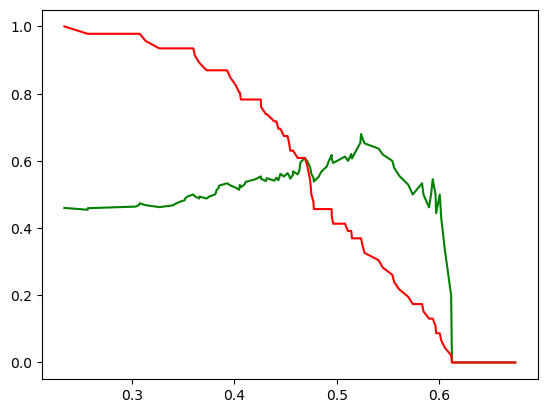

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [158]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.444826,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.342531,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.307401,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.351419,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.256515,0,1,1,1,0,0,0,0,0,0,0,0


In [159]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.59

In [160]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[23, 31],
       [10, 36]], dtype=int64)

In [161]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [162]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.5373134328358209

In [163]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.782608695652174

<font color= green>___With the current cut off as 0.41 we have Precision around 74% and Recall around 76%___</font>

## 10. Prediction on Test set

In [164]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Conversion_Prob,Conversion_Prob
0,0,0.443243
1,1,0.507523
2,1,0.493340
3,1,0.407466
4,1,0.397693


In [168]:
# Making prediction using cut off 0.41
# Sample Data
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

X_test = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'feature3': np.random.randint(0, 2, size=50)
})
y_test = pd.Series(np.random.binomial(1, 0.5, size=50))

# Fit the model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Prepare X_test and make predictions
X_test = X_test[X_train.columns]  # Ensure columns match
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Create DataFrame for predictions and actual values
y_pred_df = pd.DataFrame(y_test_pred, columns=['Conversion_Prob'])
y_test_df = pd.DataFrame(y_test, columns=['True_Label'])
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Apply cutoff of 0.41 to convert probabilities to binary predictions
y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.41 else 0)

# Display the updated DataFrame
print(y_pred_final.head())

   True_Label  Conversion_Prob  final_predicted
0           0         0.443243                1
1           1         0.507523                1
2           1         0.493340                1
3           1         0.407466                0
4           1         0.397693                0


In [170]:
# Check the overall accuracy
# Sample Data
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

X_test = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'feature3': np.random.randint(0, 2, size=50)
})
y_test = pd.Series(np.random.binomial(1, 0.5, size=50))

# Fit the model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Prepare X_test and make predictions
X_test = X_test[X_train.columns]  # Ensure columns match
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Create DataFrame for predictions and actual values
y_pred_df = pd.DataFrame(y_test_pred, columns=['Conversion_Prob'])
y_test_df = pd.DataFrame(y_test, columns=['True_Label'])
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Apply cutoff of 0.41 to convert probabilities to binary predictions
y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.41 else 0)

# Check the overall accuracy
accuracy = metrics.accuracy_score(y_pred_final['True_Label'], y_pred_final['final_predicted'])
print(f"Overall Accuracy with cutoff 0.41: {accuracy:.2f}")

Overall Accuracy with cutoff 0.41: 0.44


In [172]:
# Creating confusion matrix 
# Sample Data
np.random.seed(0)
X_train = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randint(0, 2, size=100)
})
y_train = pd.Series(np.random.binomial(1, 0.5, size=100))

X_test = pd.DataFrame({
    'feature1': np.random.randn(50),
    'feature2': np.random.randn(50),
    'feature3': np.random.randint(0, 2, size=50)
})
y_test = pd.Series(np.random.binomial(1, 0.5, size=50))

# Fit the model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Prepare X_test and make predictions
X_test = X_test[X_train.columns]  # Ensure columns match
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

# Create DataFrame for predictions and actual values
y_pred_df = pd.DataFrame(y_test_pred, columns=['Conversion_Prob'])
y_test_df = pd.DataFrame(y_test, columns=['True_Label'])
y_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

# Apply cutoff of 0.41 to convert probabilities to binary predictions
y_pred_final['final_predicted'] = y_pred_final['Conversion_Prob'].map(lambda x: 1 if x > 0.41 else 0)

# Create confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['True_Label'], y_pred_final['final_predicted'])
print("Confusion Matrix:")
print(confusion2)

Confusion Matrix:
[[ 6 20]
 [ 8 16]]


In [173]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [174]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.4444444444444444

In [175]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6666666666666666

<font color= green>___With the current cut off as 0.41 we have Precision around 73% and Recall around 75%___</font>

## Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.